In [1]:
import sys
from random import random
sys.path.append('../')
from moed.model import Sequence, Model
from moed.analysis import Analysis
from moed.proc import Proc, Filter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import struct 

X = [x/1000 for x in range(1000)]
with open("../data/v1y9.dat", "br") as f:
    Y = list(struct.unpack('1000f', f.read()))

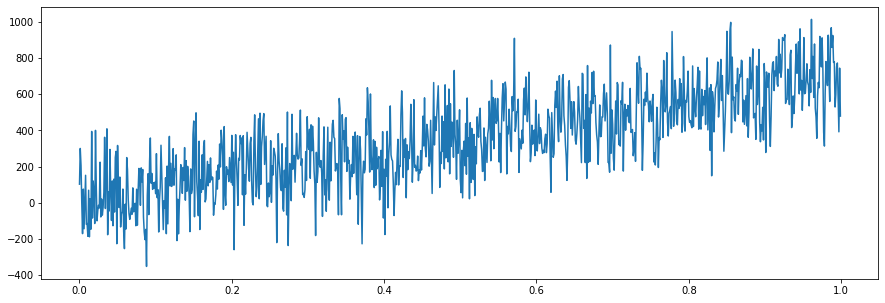

In [3]:
from collections import OrderedDict

signal = Sequence.from_dict(OrderedDict(zip(X,Y)))
signal.plot()

# Задание

Выделить не меньше двух гармоник в спектре использую функцию автокорелляции и частотные фильтры.

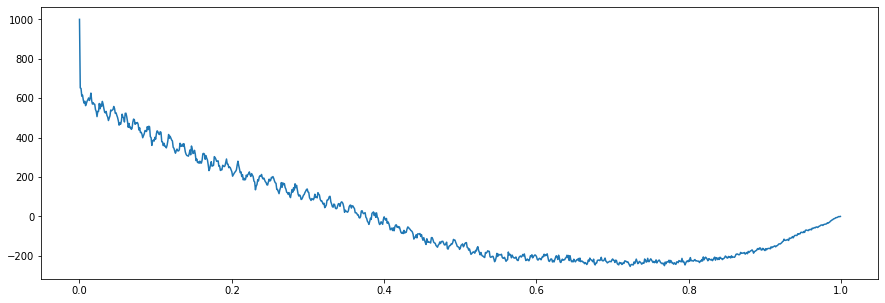

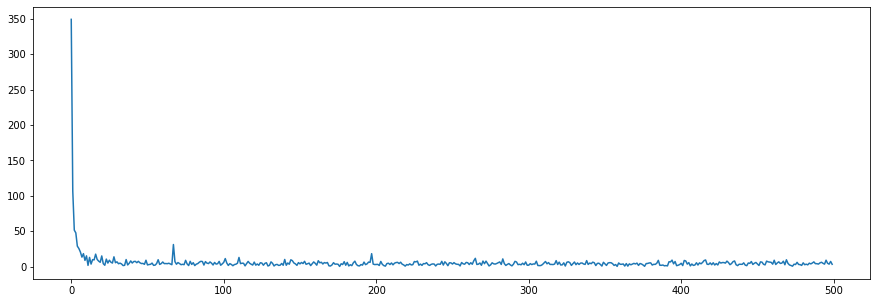

In [4]:
acf = Analysis.auto_correlation(signal)
dft = Analysis.dft(signal)

acf.plot()
dft.plot()

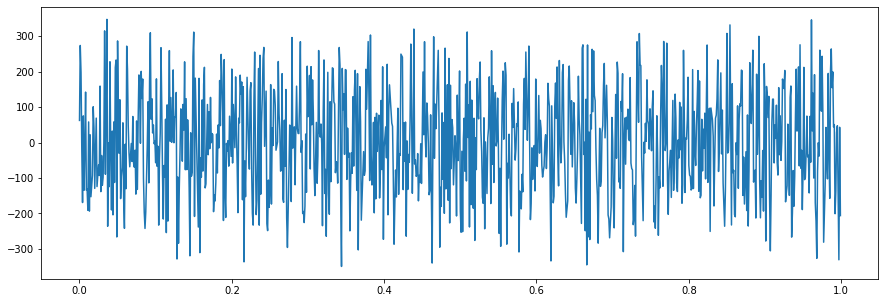

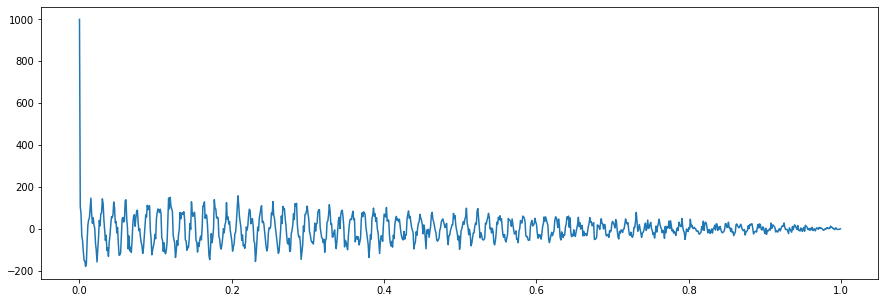

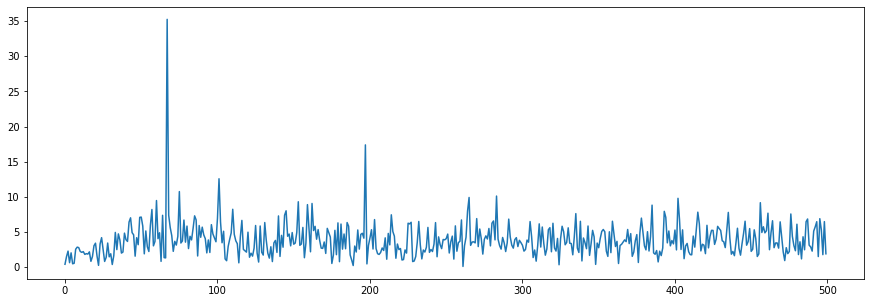

In [5]:
signal2 = Proc.untrend(signal, window_size=10)
signal2 = Proc.unspike(signal2, 350)
signal2.plot()

acf2 = Analysis.auto_correlation(signal2)
dft2 = Analysis.dft(signal2)

acf2.plot()
dft2.plot()

In [84]:
filter1 = Filter.band_pass_filter(256, 0.004, 65, 70)
filter2 = Filter.band_pass_filter(256, 0.003, 195, 200)
filter3 = Filter.high_pass_filter(32, 0.005, 195)
filter4 = Filter.low_pass_filter(32, 0.005, 200)

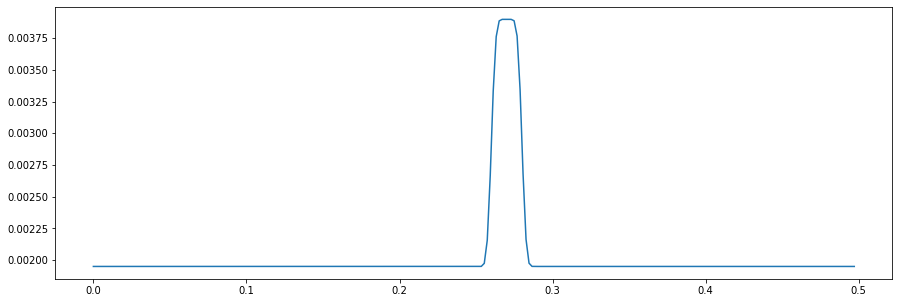

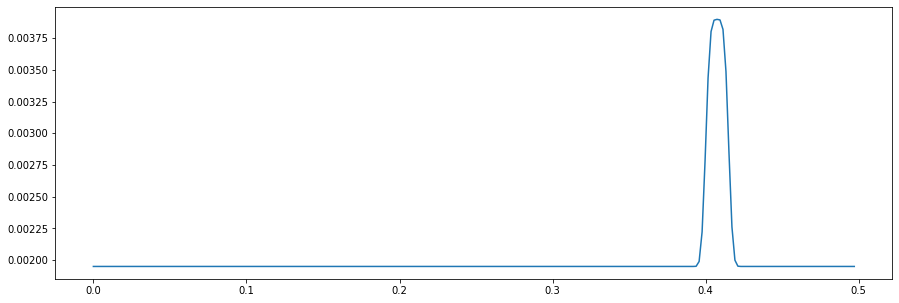

In [85]:
Analysis.dft(filter1).plot()
Analysis.dft(filter2).plot()

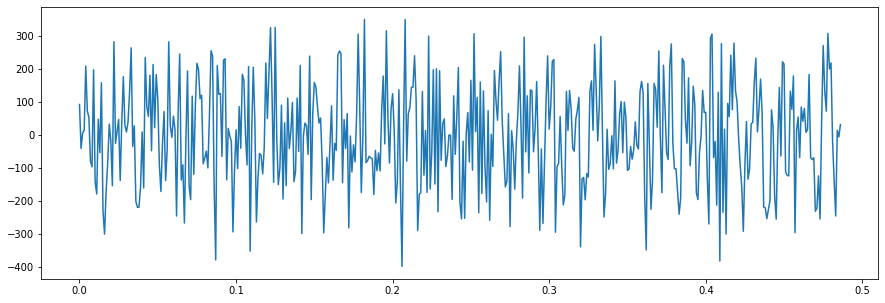

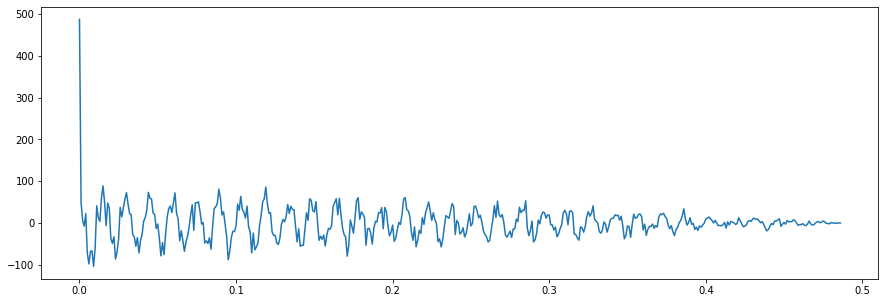

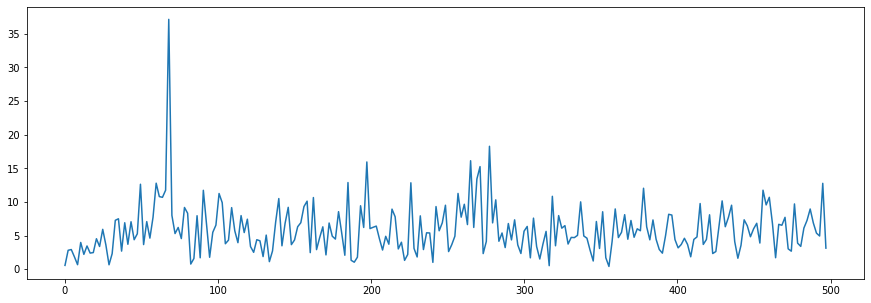

In [86]:
signal3 = Analysis.convolve(signal2, filter1)
signal3 = Sequence.from_dict(OrderedDict(zip(signal.x, signal3.y)))

acf3 = Analysis.auto_correlation(signal3)
dft3 = Analysis.dft(signal3)

signal3.plot()
acf3.plot()
dft3.plot()

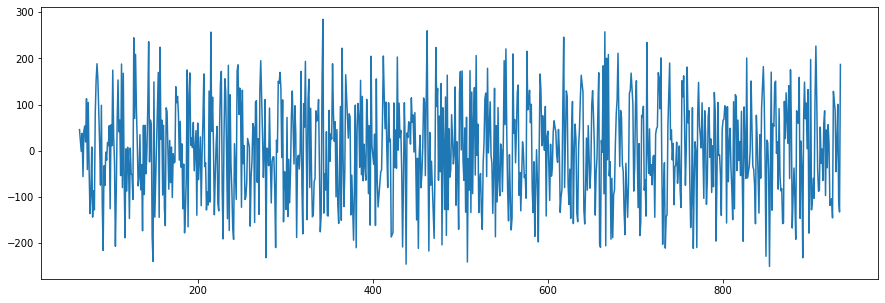

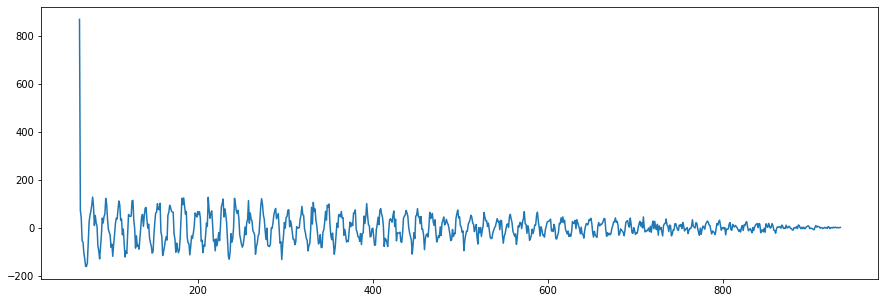

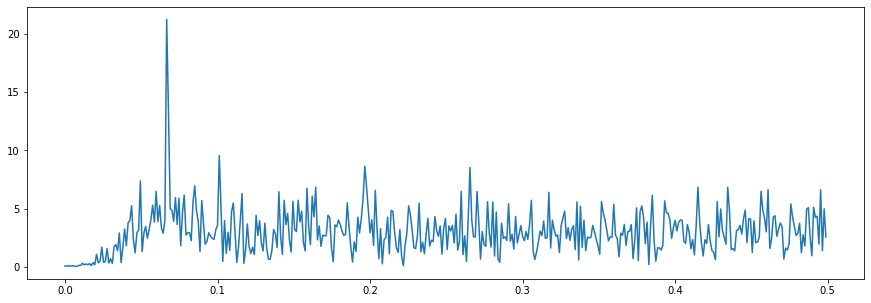

In [87]:
signal4 = Analysis.convolve(signal2, filter3)
signal4 = Analysis.convolve(signal4, filter4)

acf4 = Analysis.auto_correlation(signal4)
dft4 = Analysis.dft(signal4)

signal4.plot()
acf4.plot()
dft4.plot()

In [88]:
for x, y in dft2._seq.items():
    if y > 15:
        print(f"Частота: {x:.3f} Hz\t Амплитуда: {2*y:.2f}")

Частота: 67.000 Hz	 Амплитуда: 70.45
Частота: 197.000 Hz	 Амплитуда: 34.78
